## Bellabeat Case Study

### Introduction:

Bellabeat is a cutting-edge company specializing in women-centric, health-focused products. Established in 2013 by Urška Sršen and Sando Mur, Bellabeat has swiftly grown to become a tech-driven wellness brand for women. The company has expanded globally, opening offices worldwide, and has launched several innovative products such as the Bellabeat App, Leaf wellness tracker, Time wellness watch, and Spring smart water bottle. These products are available through a growing number of online retailers and the company's e-commerce platform.

In this analysis, I will delve into exploring and analyzing smart device fitness data to understand consumer habits and trends. The insights I generate will aid in developing a robust marketing strategy for the company. My objective is to provide high-level recommendations that will help Bellabeat thrive in the competitive global smart device market. The analysis is guided by the following questions:

* What are the current trends in smart device usage?
* How can these trends be relevant to Bellabeat’s customers?
* In what ways can these trends influence Bellabeat’s marketing strategy?

The various phases of the analysis are outlined below:

### Ask Phase

### Business Task  
The primary goal of this study is to analyze smart device usage data from Bellabeat's products to identify trends and gain insights into consumer behaviors. This analysis will guide the company's marketing strategy by focusing on the Bellabeat App, which provides users with data on their activity, stress levels, sleep patterns, menstrual cycles, and mindfulness habits. This data can help users understand their current habits and make healthier decisions.

### Stakeholders:
* Urška Sršen:** Co-founder and Chief Creative Officer at Bellabeat.
* Sando Mur:** Co-founder, Mathematician, and key member of the Bellabeat executive team.
* Bellabeat Marketing Analytics Team:** Responsible for data analysis and strategy development.

## Prepare Phase

### Data Collection: 
The data for this study was collected through a distributed survey via Amazon Mechanical Turk from December 3, 2016, to December 5, 2016. Thirty eligible Fitbit users consented to submit their personal tracking data, which includes minute-level output for physical activity, heart rate, and sleep monitoring.

* Data Source:  
Fitbit Fitness Tracker Data collected by Amazon Mechanical Turk. The dataset is available through Mobius and is designated as public domain (CC0).

* Data Format:  
The data is in long form, with each ID having multiple rows.

* Data Credibility:  
For data to be credible, it should adhere to the ROCCC criteria:
Reliable: The sample size is too small to represent the entire population, making the data less reliable.
Original: The data is original.
Comprehensive: The data is not comprehensive, given the sample size of 30 respondents and a time range of just 2 days.
Current: The data is not current as it was collected in 2016.
Cited: The data is properly cited, with the source listed under the Provenance section.

* Conclusion: 
While the dataset has limitations and is not entirely fit for comprehensive analysis, it will still be used for the purpose of this case study, keeping its limitations in mind.

* Data Privacy:  
The privacy of the respondents is maintained by not disclosing their names, instead using allocated IDs for identification.

* Datasets:  
The data is organized in two directories, providing datasets for two time periods: 3.12.16-4.11.16 and 4.12.16-5.12.16. The focus of my study is on daily activities, sleep, and weight-related information. I will be using the following datasets for each of the two directories:
* `dailyActivity_merged.csv`
* `weightLogInfo_merged.csv`
* `heartrate_seconds_merged.csv`
* `sleepDay_merged_4_12.csv`

### Process Phase**

In the process phase, the dataset needs to be cleaned to remove any errors and inaccuracies that can cause ambiguity in results. I will be using Python for processing the dataset. The focus is on:
1. Cleaning the data
2. Removing outliers
3. Transforming the data
4. Combining datasets

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [81]:
# Choosing these 4 datasets, I will create a well rounded approach to monitoring health. 
# Also i can assess sleep quality, track physical activity levels, understand heart rate responses and monitor weight changes, provinding valuable insights for improving overall well being

daily_activity = pd.read_csv("dailyActivity_merged.csv")
heart_rate = pd.read_csv("heartrate_seconds_merged.csv")
sleep = pd.read_csv("sleepDay_merged.csv")
weight = pd.read_csv("weightLogInfo_merged.csv")

### Daily Activity Dataset

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [7]:
# Display all columns in the DataFrame
print(daily_activity.columns)

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


In [8]:
## Removing Logged Activities distance variable from the dataset because I dont need it for my analysis
daily_activity.pop("LoggedActivitiesDistance")


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
935    0.0
936    0.0
937    0.0
938    0.0
939    0.0
Name: LoggedActivitiesDistance, Length: 940, dtype: float64

In [9]:
# List all column names
print(daily_activity.columns)

# Ensure the column name is correct
column_name = "LoggedActivitiesDistance"

# Check if the column exists
if column_name in daily_activity.columns:
    # Remove the column
    daily_activity = daily_activity.drop(columns=[column_name])
    print(f"Column '{column_name}' has been removed.")
else:
    print(f"Column '{column_name}' not found in DataFrame.")

# Verify the column has been removed
print(daily_activity.columns)


Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Column 'LoggedActivitiesDistance' not found in DataFrame.
Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


In [9]:
# Assuming your DataFrame is named daily_activity
# Convert the 'ActivityDate' column to datetime format
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

# Verify the conversion
print(daily_activity['ActivityDate'].dtypes)

daily_activity.drop_duplicates()


datetime64[ns]


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [47]:
## Assessing the relationship between the variable in the activity of the dataset
daily_activity.corr()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,1.000000,-0.015571,0.185721,0.241000,0.238816,0.308691,0.026665,0.019629,-0.015698,0.303608,0.051158,-0.098754,-0.043319,0.396671
ActivityDate,-0.015571,1.000000,-0.043931,-0.040169,-0.038962,-0.034487,0.037574,-0.036287,0.002254,-0.044200,0.025305,-0.049142,-0.095298,-0.092843
TotalSteps,0.185721,-0.043931,1.000000,0.985369,0.984822,0.740115,0.507105,0.692208,0.070505,0.667079,0.498693,0.569600,-0.327484,0.591568
TotalDistance,0.241000,-0.040169,0.985369,1.000000,0.999505,0.794582,0.470758,0.662002,0.082389,0.681297,0.462899,0.516300,-0.288094,0.644962
TrackerDistance,0.238816,-0.038962,0.984822,0.999505,1.000000,0.794338,0.470277,0.661365,0.074591,0.680816,0.463154,0.514713,-0.289343,0.645313
VeryActiveDistance,0.308691,-0.034487,0.740115,0.794582,0.794338,1.000000,0.192986,0.157669,0.046117,0.826681,0.211730,0.059845,-0.061754,0.491959
ModeratelyActiveDistance,0.026665,0.037574,0.507105,0.470758,0.470277,0.192986,1.000000,0.237847,0.005793,0.225464,0.946934,0.162092,-0.221436,0.216790
LightActiveDistance,0.019629,-0.036287,0.692208,0.662002,0.661365,0.157669,0.237847,1.000000,0.099503,0.154966,0.220129,0.885697,-0.413552,0.466917
SedentaryActiveDistance,-0.015698,0.002254,0.070505,0.082389,0.074591,0.046117,0.005793,0.099503,1.000000,0.008258,-0.022361,0.124185,0.035475,0.043652
VeryActiveMinutes,0.303608,-0.044200,0.667079,0.681297,0.680816,0.826681,0.225464,0.154966,0.008258,1.000000,0.312420,0.051926,-0.164671,0.615838


## Heart Rate Dataset

In [13]:
heart_rate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [14]:
heart_rate.describe()

,Id,Value
count,2.483658e+06,2.483658e+06
mean,5.513765e+09,7.732842e+01
std,1.950224e+09,1.940450e+01
min,2.022484e+09,3.600000e+01
25%,4.388162e+09,6.300000e+01
50%,5.553957e+09,7.300000e+01
75%,6.962181e+09,8.800000e+01
max,8.877689e+09,2.030000e+02


In [15]:
heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [16]:
heart_rate.columns

Index(['Id', 'Time', 'Value'], dtype='object')

In [17]:
import pandas as pd

# Example DataFrame
# heart_rate = pd.DataFrame({
#     'Time': ['4/12/2016 7:21:00 AM', '4/12/2016 7:21:00 AM', '4/13/2016 8:30:00 PM', ...],
#     'HeartRate': [70, 72, 75, ...]
# })

# Remove duplicate rows
heart_rate = heart_rate.drop_duplicates()

# Convert the 'Time' column to datetime format with the correct format
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'], format='%m/%d/%Y %I:%M:%S %p')

# Verify the changes
print(heart_rate['Time'].dtypes)

# Display the first few rows to confirm
print(heart_rate.head())


datetime64[ns]
           Id                Time  Value
0  2022484408 2016-04-12 07:21:00     97
1  2022484408 2016-04-12 07:21:05    102
2  2022484408 2016-04-12 07:21:10    105
3  2022484408 2016-04-12 07:21:20    103
4  2022484408 2016-04-12 07:21:25    101


In [18]:
heart_rate.corr()

,Id,Time,Value
Id,1.000000,-0.038290,0.059803
Time,-0.038290,1.000000,-0.020271
Value,0.059803,-0.020271,1.000000


### Sleep Dataset

In [19]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [20]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [21]:
sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [50]:
sleep.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')

In [22]:
# Example DataFrame
# sleep = pd.DataFrame({
#     'SleepDay': ['2024-12-26 01:22:00', '2024-12-26 01:22:00', '2024-12-27 02:45:00', ...]
# })

# Remove duplicates
sleep = sleep.drop_duplicates()

# Remove the time portion and convert to datetime
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay']).dt.date

# If you prefer to convert back to datetime without time
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])

# Verify the changes
print(sleep['SleepDay'].dtypes)

# Display the first few rows to confirm
print(sleep.head())


datetime64[ns]
           Id   SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0  1503960366 2016-04-12                  1                 327   
1  1503960366 2016-04-13                  2                 384   
2  1503960366 2016-04-15                  1                 412   
3  1503960366 2016-04-16                  2                 340   
4  1503960366 2016-04-17                  1                 700   

   TotalTimeInBed  
0             346  
1             407  
2             442  
3             367  
4             712  


C:\Users\User\AppData\Local\Temp\ipykernel_1744\3113472578.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay']).dt.date


In [23]:
sleep.corr()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
Id,1.000000,-0.000806,-0.011591,0.082158,0.004339
SleepDay,-0.000806,1.000000,-0.164455,-0.028277,-0.033415
TotalSleepRecords,-0.011591,-0.164455,1.000000,0.167039,0.173568
TotalMinutesAsleep,0.082158,-0.028277,0.167039,1.000000,0.930422
TotalTimeInBed,0.004339,-0.033415,0.173568,0.930422,1.000000


### Weight Dataset

In [24]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [25]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [26]:
# weight = pd.DataFrame({
#     'Date': ['5/2/2016 11:59:59 PM', '5/3/2016 12:01:00 AM', ...],
#     'Weight': [70, 71, ...],
#     'Fat': [None, None, ...]
# })

# Drop the 'Fat' column
# weight = weight.drop(columns=['Fat'])

# Remove duplicate rows
weight = weight.drop_duplicates()

# Convert the 'Date' column to datetime format with the correct format
weight['Date'] = pd.to_datetime(weight['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Verify the changes
print(weight['Date'].dtypes)

# Display the first few rows to confirm
print(weight.head())


datetime64[ns]
           Id                Date    WeightKg  WeightPounds   Fat        BMI  \
0  1503960366 2016-05-02 23:59:59   52.599998    115.963147  22.0  22.650000   
1  1503960366 2016-05-03 23:59:59   52.599998    115.963147   NaN  22.650000   
2  1927972279 2016-04-13 01:08:52  133.500000    294.317120   NaN  47.540001   
3  2873212765 2016-04-21 23:59:59   56.700001    125.002104   NaN  21.450001   
4  2873212765 2016-05-12 23:59:59   57.299999    126.324875   NaN  21.690001   

   IsManualReport          LogId  
0            True  1462233599000  
1            True  1462319999000  
2           False  1460509732000  
3            True  1461283199000  
4            True  1463097599000  


In [27]:
weight.corr()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
Id,1.000000,-0.060964,0.351346,0.351346,1.0,-0.206405,-0.606458,-0.060964
Date,-0.060964,1.000000,-0.225114,-0.225114,-1.0,-0.235677,0.143830,1.000000
WeightKg,0.351346,-0.225114,1.000000,1.000000,1.0,0.735684,-0.874964,-0.225114
WeightPounds,0.351346,-0.225114,1.000000,1.000000,1.0,0.735684,-0.874964,-0.225114
Fat,1.000000,-1.000000,1.000000,1.000000,1.0,1.000000,NaN,-1.000000
BMI,-0.206405,-0.235677,0.735684,0.735684,1.0,1.000000,-0.326147,-0.235677
IsManualReport,-0.606458,0.143830,-0.874964,-0.874964,NaN,-0.326147,1.000000,0.143830
LogId,-0.060964,1.000000,-0.225114,-0.225114,-1.0,-0.235677,0.143830,1.000000


In [62]:
weight.columns

Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId'],
      dtype='object')

## Analysis

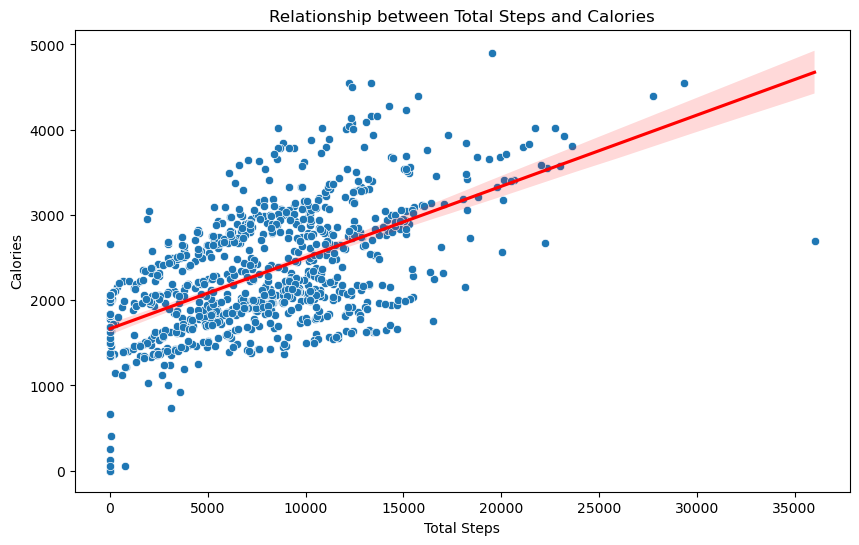

In [28]:
# Create a scatter plot with a line of best fit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_activity, x='TotalSteps', y='Calories')
sns.regplot(data=daily_activity, x='TotalSteps', y='Calories', scatter=False, color='red')

# Add titles and labels
plt.title('Relationship between Total Steps and Calories')
plt.xlabel('Total Steps')
plt.ylabel('Calories')

# Show the plot
plt.show()


In [29]:
# Calculate the Pearson correlation coefficient
correlation = daily_activity['TotalSteps'].corr(daily_activity['Calories'])

# Display the correlation coefficient
print(f"Correlation coefficient between Total Steps and Calories: {correlation:.2f}")


Correlation coefficient between Total Steps and Calories: 0.59


### The is a relationship between total steps and calories, implying that the more steps a person walks the more calories there will burn

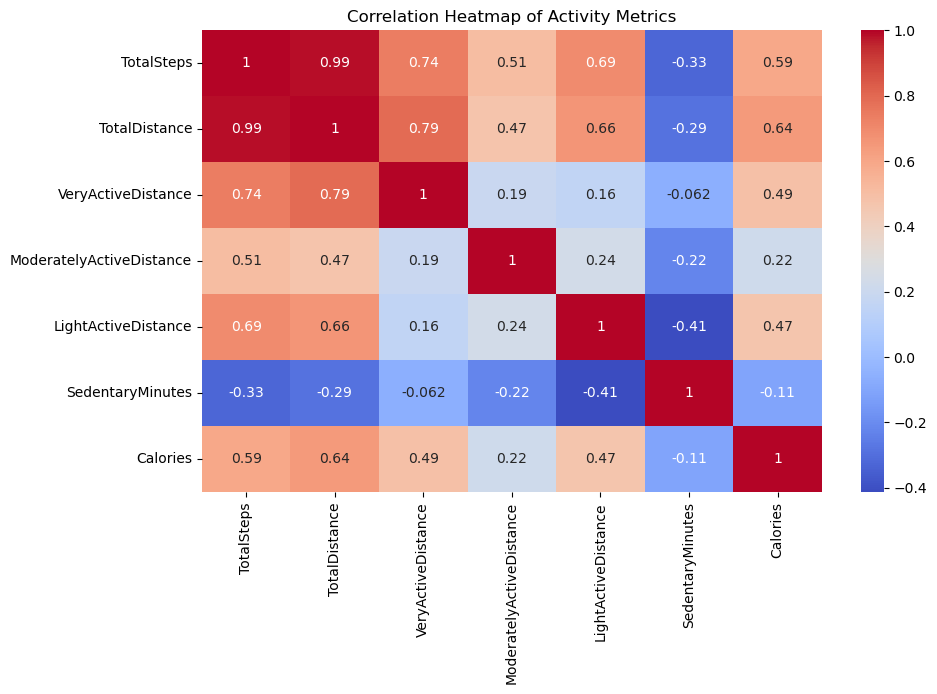

In [30]:
plt.figure(figsize=(10, 6))
corr = daily_activity[['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryMinutes', 'Calories']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Activity Metrics')
plt.show()


#### Overall relationship between the variables of the daily activity datasets

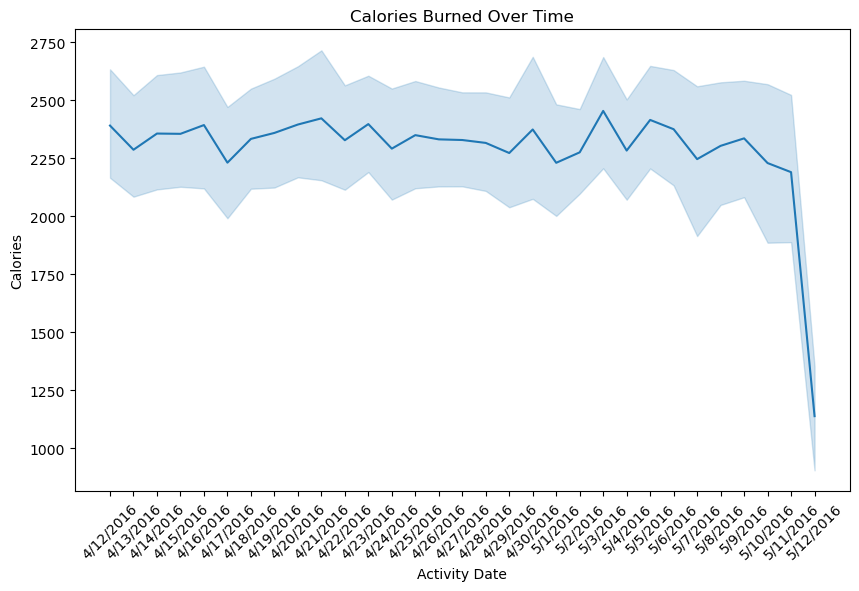

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_activity, x='ActivityDate', y='Calories')
plt.title('Calories Burned Over Time')
plt.xlabel('Activity Date')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.show()


#### The more days a person exercises the more calories there can lose overtime

Percentage of users hitting the average calorie burn target: 39.39%
Percentage of users missing the average calorie burn target: 60.61%


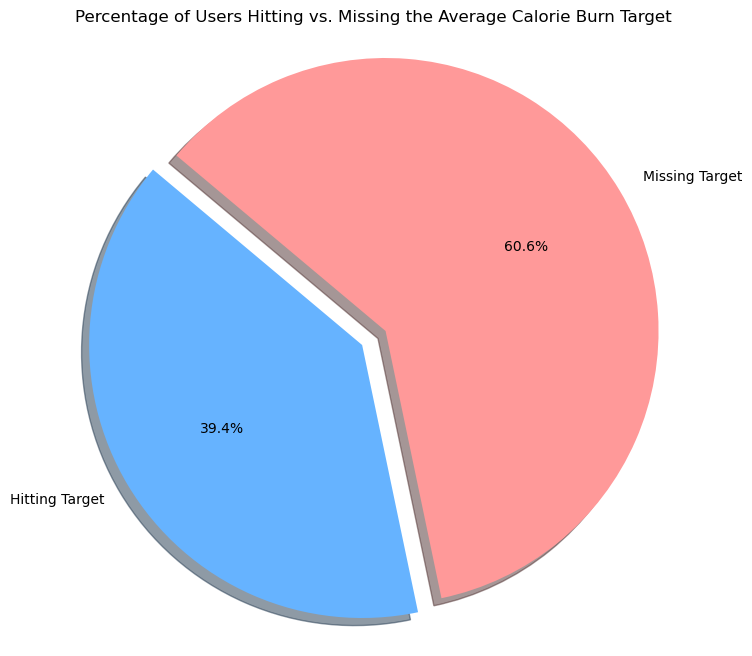

In [46]:
# Assuming 'daily_activity' DataFrame is already provided

# Calculate the average burned calories for each user and store it in an array
avg_calorie_by_user = daily_activity.groupby('Id')['Calories'].mean().values

# Convert to DataFrame for easier processing
avg_calorie_df = pd.DataFrame({
    'Id': daily_activity['Id'].unique(),
    'AvgCalories': avg_calorie_by_user
})

# Calculate the overall average calorie burn
overall_avg_calories = avg_calorie_df['AvgCalories'].mean()

# Determine users hitting and missing the average calorie burn target
num_users = len(avg_calorie_df)
num_users_hitting_target = len(avg_calorie_df[avg_calorie_df['AvgCalories'] >= overall_avg_calories])
num_users_missing_target = num_users - num_users_hitting_target

percentage_hitting_target = (num_users_hitting_target / num_users) * 100
percentage_missing_target = (num_users_missing_target / num_users) * 100

# Display the results
print(f"Percentage of users hitting the average calorie burn target: {percentage_hitting_target:.2f}%")
print(f"Percentage of users missing the average calorie burn target: {percentage_missing_target:.2f}%")

# Create a pie chart
labels = ['Hitting Target', 'Missing Target']
sizes = [percentage_hitting_target, percentage_missing_target]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentage of Users Hitting vs. Missing the Average Calorie Burn Target')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


#### About 60% of our active participant are not hitting there calories burn target

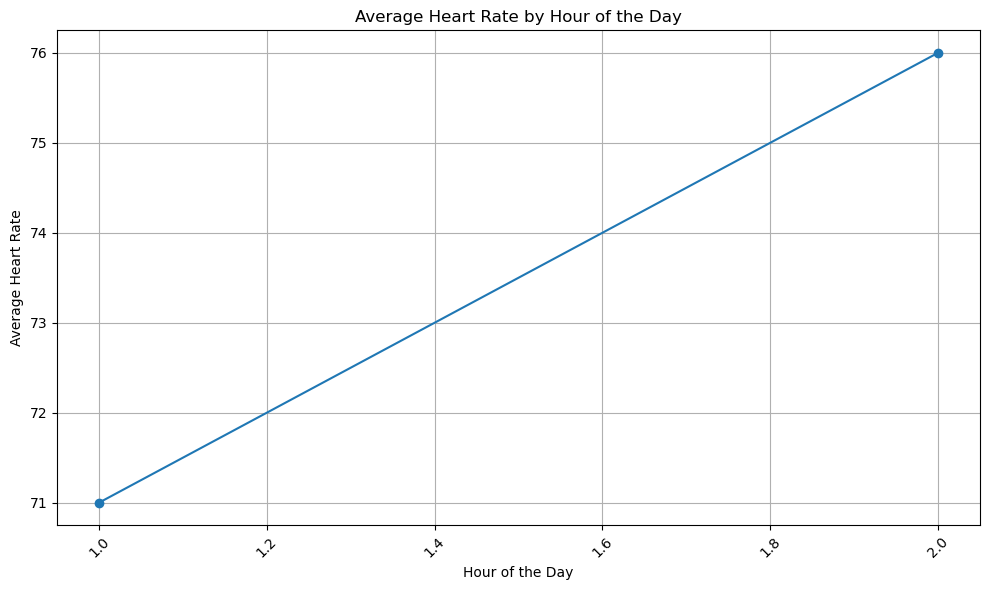

In [45]:
# Sample heart rate data (replace with your actual data)


heart_rate['Time'] = pd.to_datetime(heart_rate['Time'])

# Calculate the average heart rate by hour of the day
avg_heart_rate_by_time = round(heart_rate.groupby(heart_rate['Time'].dt.hour)['Value'].mean()).astype(int)

# Reset the index to convert hour from index to column
avg_heart_rate_by_time = avg_heart_rate_by_time.reset_index()

# Plotting the average heart rate by hour of the day
plt.figure(figsize=(10, 6))
plt.plot(avg_heart_rate_by_time['Time'], avg_heart_rate_by_time['Value'], marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Heart Rate')
plt.title('Average Heart Rate by Hour of the Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


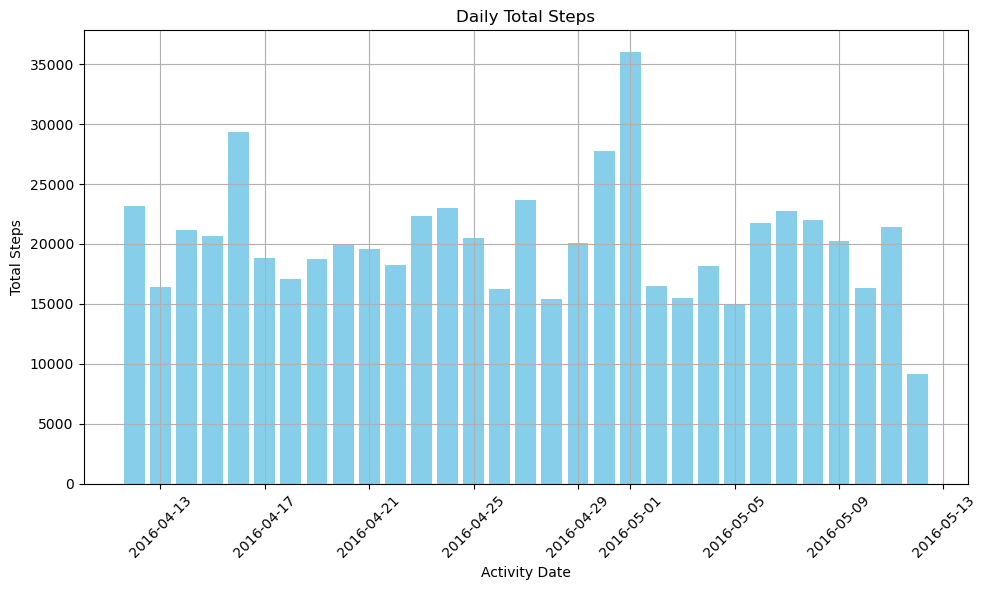

In [43]:


# Convert 'ActivityDate' to datetime
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

# Plotting the Total Steps per day
plt.figure(figsize=(10, 6))
plt.bar(daily_activity['ActivityDate'], daily_activity['TotalSteps'], color='skyblue')
plt.xlabel('Activity Date')
plt.ylabel('Total Steps')
plt.title('Daily Total Steps')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Clients are always meeting the benchmark steps a person (10000) should walk to maintain healthiness

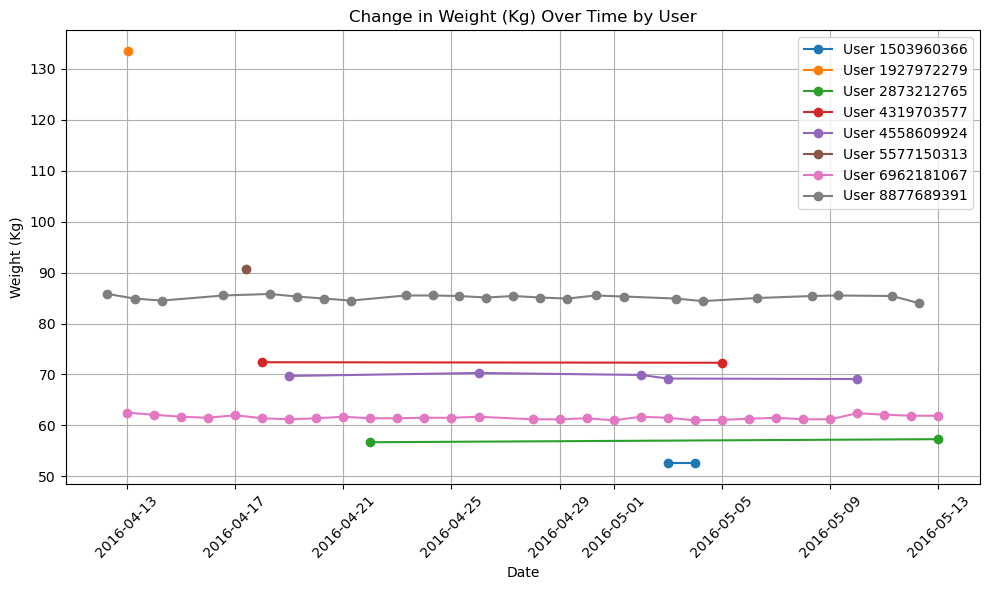

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'weight' DataFrame is already provided and contains the necessary columns

# Sort the DataFrame by 'Id' and 'Date'
weight = weight.sort_values(by=['Id', 'Date'])

# Plotting the changes in WeightKg over time for each user
plt.figure(figsize=(10, 6))

# Loop through each user and plot their weight changes
for user_id in weight['Id'].unique():
    user_data = weight[weight['Id'] == user_id]
    plt.plot(user_data['Date'], user_data['WeightKg'], marker='o', linestyle='-', label=f'User {user_id}')

plt.xlabel('Date')
plt.ylabel('Weight (Kg)')
plt.title('Change in Weight (Kg) Over Time by User')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


#### Trends of weight in kg of our clients overtime which showing steadiness overtime

C:\Users\User\AppData\Local\Temp\ipykernel_1744\1107902741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_weight['Date'] = pd.to_datetime(auto_weight['Date'])


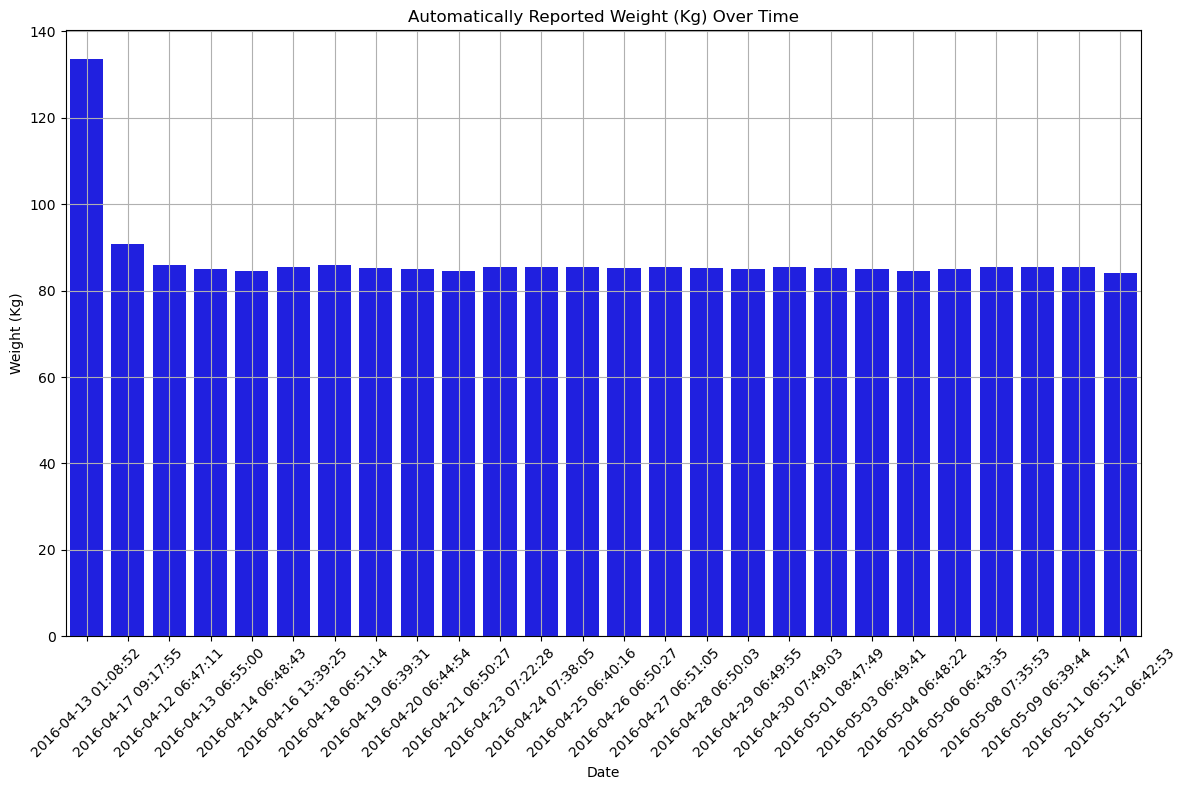

In [73]:
# Assuming 'auto_weight' DataFrame contains automatically reported weights
# Replace with your actual automatically reported weight dataset
auto_weight = weight[weight['IsManualReport'] == False]

# Convert 'Date' to datetime format if not already done
auto_weight['Date'] = pd.to_datetime(auto_weight['Date'])

# Plotting the bar chart for automatically reported weights
plt.figure(figsize=(12, 8))
sns.barplot(x='Date', y='WeightKg', data=auto_weight, color='blue')  # Using 'blue' for automatically reported weights
plt.xlabel('Date')
plt.ylabel('Weight (Kg)')
plt.title('Automatically Reported Weight (Kg) Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [80]:
daily_activity.columns

Index(['total_distance', 'calories', 'StepCategory'], dtype='object')

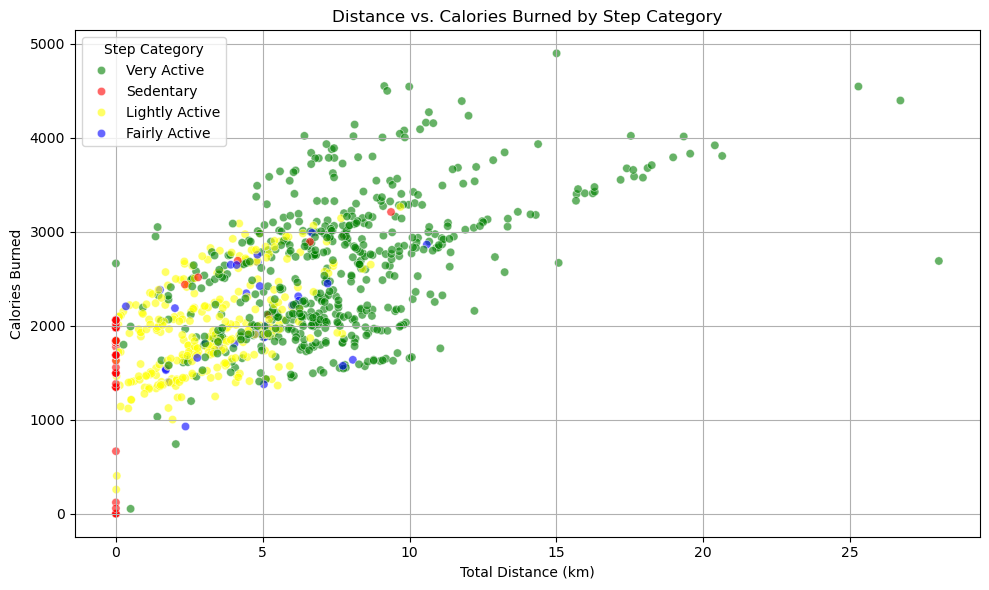

In [83]:
# Assuming 'daily_activity' DataFrame is already provided and contains the necessary columns

# Categorize the steps into different activity levels based on activity minutes
def categorize_steps(row):
    if row['VeryActiveMinutes'] > 0:
        return 'Very Active'
    elif row['FairlyActiveMinutes'] > 0:
        return 'Fairly Active'
    elif row['LightlyActiveMinutes'] > 0:
        return 'Lightly Active'
    else:
        return 'Sedentary'

# Apply the categorization to the DataFrame
daily_activity['StepCategory'] = daily_activity.apply(categorize_steps, axis=1)

# Define the color palette for the step categories
colors = {
    'Sedentary': 'red',
    'Lightly Active': 'yellow',
    'Fairly Active': 'blue',
    'Very Active': 'green'
}

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_activity, x='TotalDistance', y='Calories', hue='StepCategory', palette=colors, alpha=0.6)
plt.title('Distance vs. Calories Burned by Step Category')
plt.xlabel('Total Distance (km)')
plt.ylabel('Calories Burned')
plt.legend(title='Step Category')
plt.grid(True)
plt.tight_layout()
plt.show()


### Very active clients tend to lose more calories than the sedentary clients. Making it our aim to encourage our active clients to increase there distance to burn more calories

## Recommendations


### Communicate the Relationship Between Steps and Calories
* Explanation: There is a positive relationship between total steps and calories burned. The more steps a person takes, the more calories they will burn.

* Action: Highlight this relationship in marketing campaigns to motivate users. Use visuals and charts in emails or in-app messages to show users how increasing their step count can help them reach their calorie burn targets.

* Enhancement: Create interactive tools or calculators within the app that allow users to visualize the impact of their daily steps on their calorie burn and overall health. Use real-time data to show progress and motivate users to stay active.

* New Action: Address the challenge where users are meeting their step goals but falling short on calorie burn by providing actionable tips:

* Incorporate More Intense Activities: Suggest users include bursts of high-intensity interval training (HIIT) or quick sprint intervals in their walking routines to increase calorie burn.

* Strength Training: Encourage users to add resistance exercises, such as bodyweight workouts or lifting weights, to their daily regimen. These activities can boost metabolism and help burn more calories.

* Active Lifestyle Habits: Promote small lifestyle changes that increase overall activity, such as taking stairs instead of elevators, standing or walking meetings, and regular stretching or movement breaks throughout the day.

* Nutrition Advice: Offer guidance on combining physical activity with healthy eating habits to achieve better calorie burn and overall health.

### Example Campaign Messaging
* "Achieving your step goals? Great! Let's take it a step further by incorporating high-intensity bursts or strength training to boost your calorie burn."

* "Small changes can lead to big results. Add quick sprints or bodyweight exercises to your walks to enhance your fitness journey."

* "Don't just walk—power walk! Increase your pace during your daily walks to burn more calories and improve your health."

### Personalized Recommendations
* Strategy: Use the data to create personalized workout and nutrition plans for users who are not meeting their calorie burn goals.

* Example: Send targeted emails or app notifications with tips on how to adjust their daily routines to include more calorie-burning activities.

* Enhancement: Introduce AI-driven recommendations based on user preferences and past behaviors. Integrate feedback loops where users can rate the recommendations to further personalize future suggestions.

## License
* This Notebook has been released under the Apache 2.0 open source license.